# A minimal example with BatchLinearDyBM
- Author: Rudy Raymond, Takayuki Osogami
- Date: Jul. 18, 2017
- (C) Copyright IBM Corp. 2016

Here we provide an example of how to train a DyBM in a batch manner and how to give prediction with that DyBM. We train the simplest batch version of DyBM, BatchLinearDyBM, with a one-dimensional time-series of noisy sine wave. After we train the DyBM using the time-series in batch manner, we let the DyBM predict one-step-ahead of a noise-less sine wave. In the end, we plot the noise-less sine wave and the corresponding predictions.

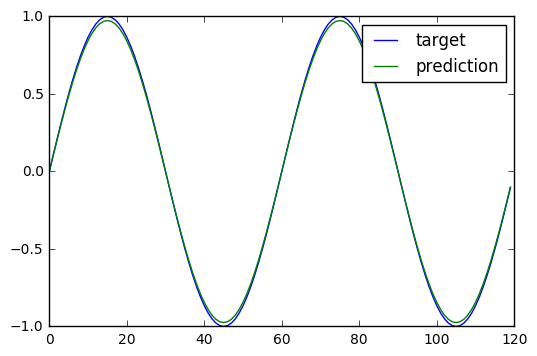

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pydybm.time_series.batch_dybm import BatchLinearDyBM
from pydybm.base.generator import NoisySin

# Prepare a generator of time-series
# In this example, we generate a noisy sine wave
length = 300 # length of the time-series
period = 60  # period of the sine wave
std = 0.1   # standard deviation of the noise
dim = 1      # dimension of the time-series
data = NoisySin(length,period,std,dim)
npData = np.array(data.to_list())     #  get sequence of data because batch cannot learn from generator 

# Create a DyBM
# In this example, we use a Linear DyBM
dybm = BatchLinearDyBM(dim, delay=2)

# Learn the time-series
dybm.fit(npData)

# Predict against noise-less sine wave
dybm.init_state()
test_gen = NoisySin(period*2, period, std=0, dim=dim)
result = dybm.predict(test_gen)

# Plot the time-series and prediction
test_data = test_gen.to_list()
plt.plot([x[0] for x in test_data],label="target")
plt.plot([x[0] for x in result],label="prediction")
plt.legend()